# Evaluation of the BDT
Using ROOT files directly to make sure the framework implementation is working correctly.

In [1]:
import numpy as np
import pandas as pd
import uproot as up
import boost_histogram as bh
import hist
from hist import Hist
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
hep.style.use(hep.style.ROOT)

## Import Data

In [35]:
with up.open("./data/2022_upstream_acceptance_test.root:PNNAnalysis") as f:
    # Standard PNN selection excluding kinematic regions, NOT blinded!
    # Only difference is old TMVA vs new BDT (XGB)
    mmiss_cur = f["upstream_old_mmiss_vs_p"].to_hist()
    mmiss_new = f["upstream_new_mmiss_vs_p"].to_hist()
    region_cur = f["upstream_old_region"].to_hist()
    region_new = f["upstream_new_region"].to_hist()

In [25]:
def plot_mmiss_vs_p(h):
    plt.figure(figsize=(8,6))
    hep.hist2dplot(h, cmap="jet", norm=LogNorm())
    plt.xlim(10, 50)
    plt.ylim(-0.1, 0.15)
    plt.xlabel("p [GeV/c]")
    plt.ylabel(r"$m^2_{miss}$ [GeV$^2/c^4$]")
    plt.grid()
    plt.show()

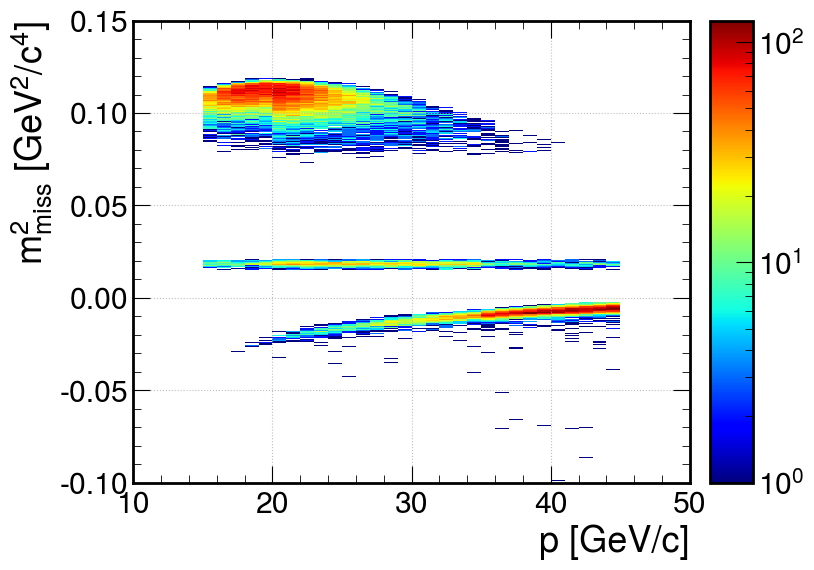

In [26]:
plot_mmiss_vs_p(mmiss_cur)

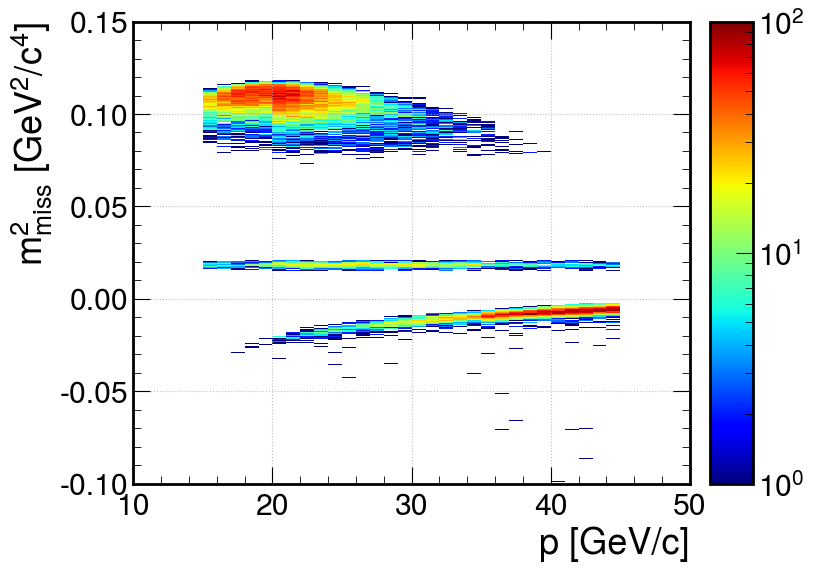

In [27]:
plot_mmiss_vs_p(mmiss_new)

Now lets print the region counts just so we can see more easily any actual difference.

In [4]:
regions = {
    'sr1': 1, # signal region 1
    'sr2': 2, # signal region 2
    'k2pi': 3, # K2pi background region
    'kmu2': 4, # Kmu2 background region
    'k3pi': 5, # k3pi background region
    'ups': 6, # upstream backgroun region (-ve mm2)
    'cr1': 10,
    'cr2': 20,
    'crmu': 30,
    'crmu1': 31,
    'crmu2': 32,
    'cr3pi': 40,
    'cr3d': 50,
}

In [44]:
rois = ['k2pi', 'kmu2', 'k3pi', 'ups'] # We dont look in any control or signal regions
for r in rois:
    try:
        change = (region_new[regions[r]] - region_cur[regions[r]]) / region_cur[regions[r]] * 100
    except:
        change = 0
    print(f"TMVA: {r} = {region_cur[regions[r]]}\t BDT: {r} = {region_new[regions[r]]}\t Change: {change:.2f}%")

TMVA: k2pi = 3150.0	 BDT: k2pi = 2307.0	 Change: -26.76%
TMVA: kmu2 = 8476.0	 BDT: kmu2 = 6574.0	 Change: -22.44%
TMVA: k3pi = 18521.0	 BDT: k3pi = 14431.0	 Change: -22.08%
TMVA: ups = 15.0	 BDT: ups = 12.0	 Change: -20.00%


These results look suspiciously good...maybe we have just vetoed basically all of our signal by accident.

## SampleC

In [5]:
with up.open("./data/pprich1/2022_upstream_sampleC.root:PNNAnalysis") as f:
    # Standard PNN selection excluding kinematic regions, NOT blinded!
    # non-overlaid MC
    #preds = f["upstream_new_pred"].to_hist()
    mmiss_cur = f["upstream_old_mmiss_vs_p"].to_hist()
    mmiss_new = f["upstream_new_mmiss_vs_p"].to_hist()
    region_cur = f["upstream_old_region"].to_hist()
    region_new = f["upstream_new_region"].to_hist()

In [6]:
rois = ['k2pi', 'kmu2', 'k3pi', 'ups', 'sr1', 'sr2'] # We dont look in any control or signal regions
for r in rois:
    change = (region_new[regions[r]] - region_cur[regions[r]]) / region_cur[regions[r]] * 100
    print(f"TMVA: {r} = {region_cur[regions[r]]}\t BDT: {r} = {region_new[regions[r]]}\t Change: {change:.2f}%")

TMVA: k2pi = 120.0	 BDT: k2pi = 204.0	 Change: 70.00%
TMVA: kmu2 = 202.0	 BDT: kmu2 = 278.0	 Change: 37.62%
TMVA: k3pi = 1549.0	 BDT: k3pi = 7951.0	 Change: 413.30%
TMVA: ups = 115.0	 BDT: ups = 181.0	 Change: 57.39%
TMVA: sr1 = 9.0	 BDT: sr1 = 13.0	 Change: 44.44%
TMVA: sr2 = 47.0	 BDT: sr2 = 2338.0	 Change: 4874.47%


## Signal Acceptances (Non-overlaid)

In [2]:
with up.open("./data/kaonTree/kpinn_noov_upstream_KaonTree_v2.root:PNNAnalysis") as f:
    # Standard PNN selection excluding kinematic regions, NOT blinded!
    # non-overlaid MC
    mmiss_cur = f["upstream_old_mmiss_vs_p"].to_hist()
    mmiss_new = f["upstream_new_mmiss_vs_p"].to_hist()
    region_cur = f["upstream_old_region"].to_hist()
    region_new = f["upstream_new_region"].to_hist()

In [5]:
rois = ['k2pi', 'kmu2', 'k3pi', 'ups', 'sr1', 'sr2'] # We dont look in any control or signal regions
for r in rois:
    change = (region_new[regions[r]] - region_cur[regions[r]]) / region_cur[regions[r]] * 100
    print(f"TMVA: {r} = {region_cur[regions[r]]}\t BDT: {r} = {region_new[regions[r]]}\t Change: {change:.2f}%")

TMVA: k2pi = 249816.0	 BDT: k2pi = 288637.0	 Change: 15.54%
TMVA: kmu2 = 333.0	 BDT: kmu2 = 400.0	 Change: 20.12%
TMVA: k3pi = 271133.0	 BDT: k3pi = 385484.0	 Change: 42.18%
TMVA: ups = 1.0	 BDT: ups = 1.0	 Change: 0.00%
TMVA: sr1 = 213984.0	 BDT: sr1 = 237575.0	 Change: 11.02%
TMVA: sr2 = 1155778.0	 BDT: sr2 = 1403558.0	 Change: 21.44%


## Signal Acceptances (Overlaid)

In [57]:
with up.open("./data/kpinn_overlaid_upstream_acceptance_test.root:PNNAnalysis") as f:
    # Standard PNN selection excluding kinematic regions, NOT blinded!
    mmiss_cur = f["upstream_old_mmiss_vs_p"].to_hist()
    mmiss_new = f["upstream_new_mmiss_vs_p"].to_hist()
    region_cur = f["upstream_old_region"].to_hist()
    region_new = f["upstream_new_region"].to_hist()

rois = ['k2pi', 'kmu2', 'k3pi', 'ups', 'sr1', 'sr2'] # We dont look in any control or signal regions
for r in rois:
    try:
        change = (region_new[regions[r]] - region_cur[regions[r]]) / region_cur[regions[r]] * 100
    except:
        change = 0
    print(f"TMVA: {r} = {region_cur[regions[r]]}\t BDT: {r} = {region_new[regions[r]]}\t Change: {change:.2f}%")

TMVA: k2pi = 58338.0	 BDT: k2pi = 52404.0	 Change: -10.17%
TMVA: kmu2 = 168.0	 BDT: kmu2 = 162.0	 Change: -3.57%
TMVA: k3pi = 60823.0	 BDT: k3pi = 54139.0	 Change: -10.99%
TMVA: ups = 0.0	 BDT: ups = 0.0	 Change: 0.00%
TMVA: sr1 = 49859.0	 BDT: sr1 = 43796.0	 Change: -12.16%
TMVA: sr2 = 265496.0	 BDT: sr2 = 238707.0	 Change: -10.09%


HERE IS THE ANSWER - WE JUST VETO EVERYTHING!

## Random Veto
Okay still looks good. Maybe we have impacted random veto performance and made that a lot worse?